Importing Libaries and Inspection

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns

In [8]:
da_jobs = pd.read_csv('DataAnalyst.csv',index_col=0)

In [9]:
da_jobs.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [10]:
da_jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2253 entries, 0 to 2252
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          2253 non-null   object 
 1   Salary Estimate    2253 non-null   object 
 2   Job Description    2253 non-null   object 
 3   Rating             2253 non-null   float64
 4   Company Name       2252 non-null   object 
 5   Location           2253 non-null   object 
 6   Headquarters       2253 non-null   object 
 7   Size               2253 non-null   object 
 8   Founded            2253 non-null   int64  
 9   Type of ownership  2253 non-null   object 
 10  Industry           2253 non-null   object 
 11  Sector             2253 non-null   object 
 12  Revenue            2253 non-null   object 
 13  Competitors        2253 non-null   object 
 14  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(1), object(13)
memory usage: 281.6+ KB


Check if there is any null values

<AxesSubplot:>

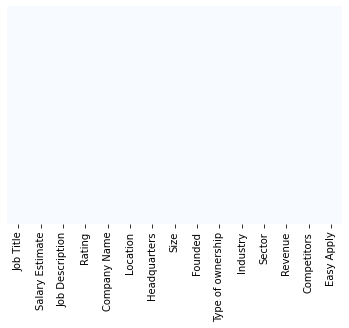

In [11]:
sns.heatmap(da_jobs.isnull(), cbar=False, yticklabels=False, cmap='Blues')

It may look there isn't any null values, but when I replaced -1 (Which seems like a bug when the data was stored) with NaN...

In [12]:
da_jobs.replace("-1", np.nan, inplace=True)
da_jobs.replace(-1, np.nan, inplace=True)
da_jobs.replace(-1.0, np.nan, inplace=True)

I get a lot of null values

<AxesSubplot:>

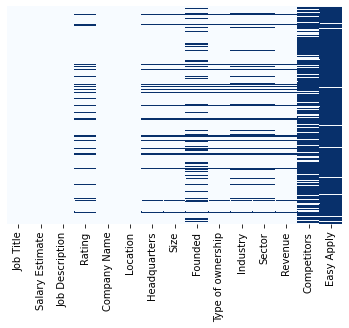

In [13]:
sns.heatmap(da_jobs.isnull(), cbar=False, yticklabels=False, cmap='Blues')

To fix this I dropped the features that I will not use and null values

In [14]:
da_jobs.drop(['Competitors','Easy Apply'], axis=1, inplace=True)

In [15]:
da_jobs.dropna(inplace=True)

Aaaaand it's gone

<AxesSubplot:>

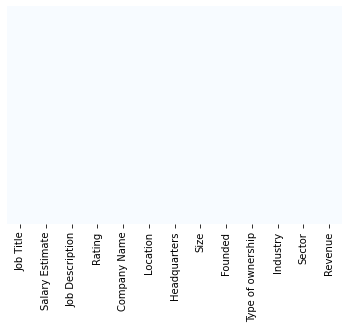

In [16]:
sns.heatmap(da_jobs.isnull(), cbar=False, yticklabels=False, cmap='Blues')

I split the seniority from the Job Title Column

In [17]:
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'Senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower() or 'junior' in title.lower():
        return 'Junior'
    else:
        return 'na'

In [18]:
da_jobs['Job_Seniority'] = da_jobs['Job Title'].apply(seniority)
da_jobs['Job_Seniority'].value_counts()

na        1122
Senior     372
Junior      65
Name: Job_Seniority, dtype: int64

I calculate the average salary based on the Salary Estimate column

In [19]:
def Avg_Salary(sal):
    if len(sal) == 26:
        avg_sal = (int(sal[1:3]) + int(sal[6:8])) / 2
        return avg_sal
    elif len(sal) == 27:
        avg_sal = (int(sal[1:3]) + int(sal[6:9])) / 2
        return avg_sal
    elif len(sal) == 28:
        avg_sal = (int(sal[1:4]) + int(sal[7:10])) / 2
        return avg_sal
    else:
        return 0

In [20]:
da_jobs['Avg_Salary'] = da_jobs['Salary Estimate'].apply(Avg_Salary) 

I parsed the Company Name from the rating 

In [21]:
da_jobs['Company Name'] = da_jobs['Company Name'].apply(lambda x: x.split('\n')[0])

I parsed the state of the data analyst jobs's location

In [22]:
da_jobs['Job_State'] = da_jobs['Location'].apply(lambda x: x[-2:])

Made a new column of the state of the data analyst jobs's headquarters in the same state as the location of the job

In [23]:
def same_state(state):
    if state['Headquarters'][-2:] == state['Job_State']:
        return state['Headquarters'][-2:]
    else:
        return 'na'

In [24]:
da_jobs['HQ_Same_State'] = da_jobs.apply(same_state, axis=1)
da_jobs['HQ_Same_State']

0       NY
1       NY
2       NY
3       na
4       NY
        ..
2243    na
2245    na
2249    CO
2251    na
2252    CO
Name: HQ_Same_State, Length: 1559, dtype: object

I subtract the year 2020 with the year from the Founded column to get the age of the company

In [25]:
da_jobs['Age'] = da_jobs['Founded'].apply(lambda x: 2020 - x)

I seperate data analyst tools from the Job Title column

In [26]:
#python
da_jobs['Python'] = da_jobs['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
da_jobs['Python'].value_counts()

0    1094
1     465
Name: Python, dtype: int64

In [27]:
#tableau 
da_jobs['Tableau'] = da_jobs['Job Description'].apply(lambda x: 1 if 'tableau' in x.lower() else 0)
da_jobs['Tableau'].value_counts()

0    1102
1     457
Name: Tableau, dtype: int64

In [28]:
#spark 
da_jobs['Spark'] = da_jobs['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() or 'pyspark' in x.lower() else 0)
da_jobs['Spark'].value_counts()

0    1493
1      66
Name: Spark, dtype: int64

In [29]:
#power bi 
da_jobs['PowerBI'] = da_jobs['Job Description'].apply(lambda x: 1 if 'power bi' in x.lower() else 0)
da_jobs['PowerBI'].value_counts()

0    1435
1     124
Name: PowerBI, dtype: int64

In [30]:
#excel
da_jobs['Excel'] = da_jobs['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)
da_jobs['Excel'].value_counts()

1    972
0    587
Name: Excel, dtype: int64

In [31]:
#sql
da_jobs['SQL'] = da_jobs['Job Description'].apply(lambda x: 1 if 'sql' in x.lower() else 0)
da_jobs['SQL'].value_counts()

1    978
0    581
Name: SQL, dtype: int64

Export the cleaned data to a csv file

In [32]:
da_jobs.to_csv('Cleaned_Data.csv')

In [36]:
da_jobs['Job_State'].nunique()

19